# Employee Attrition Rate Analysis

Employee retention strategies are integral to the success and well-being of a company. There are often many reasons why employees leave an organization, and in this case study, I will explore some of the key drivers of employee attrition. Employee attrition measures how many workers have left an organization and is a common metric companies use to assess their performance. While turnover rates vary from industry to industry, the Bureau of Labor Statistics reported that among voluntary separations the overall turnover rate was 25% in 2020.

In this notebook, I will explore IBM's dataset on HR Analytics. The data consists of nearly 1,500 employees with information related to their job satisfaction, work life balance, tenure, experience, salary, and demographic data. Below is a brief overview and summary statistics of the data.

Dataset Link:
    https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import math
import seaborn as sns 
sns.set()


In [2]:
emp = pd.read_csv("C:/Users/4150873/OneDrive - Lowe's Companies Inc/Desktop/Python/WA_Fn-UseC_-HR-Employee-Attrition.csv")
emp.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


There are 5 rows and 35 columns in this dataset

DataTypes of the Dataset

In [3]:
emp.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

# 1. Summary Statistics of numeric variables

In [4]:
emp.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


There are 1470 rows and dont have any null values

# 2. Summary Statistics of categorical variables

In [5]:
cat_cols=emp.select_dtypes(include=object).columns.tolist()
print (cat_cols)
cat_df=pd.DataFrame(emp[cat_cols].melt(var_name='column', value_name='value')
                    .value_counts()).rename(columns={0: 'count'}).sort_values(by=['column', 'count'])
display(emp.select_dtypes(include=object).describe())
display(cat_df)

['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']


,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,1470,1470,1470,1470,1470,1470,1470,1470,1470
unique,2,3,3,6,2,9,3,1,2
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No
freq,1233,1043,961,606,882,326,673,1470,1054


count
column         value                           
Attrition      Yes                          237
               No                          1233
BusinessTravel Non-Travel                   150
               Travel_Frequently            277
               Travel_Rarely               1043
Department     Human Resources               63
               Sales                        446
               Research & Development       961
EducationField Human Resources               27
               Other                         82
               Technical Degree             132
               Marketing                    159
               Medical                      464
               Life Sciences                606
Gender         Female                       588
               Male                         882
JobRole        Human Resources               52
               Research Director             80
               Sales Representative          83
               Manager                      102
               Healthcare Representative    131
               Manufacturing Director       145
               Laboratory Technician        259
               Research Scientist           292
               Sales Executive              326
MaritalStatus  Divorced                     327
               Single                       470
               Married                      673
Over18         Y                           1470
OverTime       Yes                          416
               No                          1054

# 3.Hypothesis Testing

Independent T-Test
To compare the average monthly income among current and former employees, I'll perform an independent t-test. This will allow us to determine whether there is a statistically significant difference between the average incomes of the two populations. To test this, I'll use the log-transformed data since one of the assumptions of the test is that the continuous variable is approximately normally distributed.


Hypothesis:
H0: The null hypothesis for the t-test is that the average monthly income of former employees is the same as current employees.
u1=u2

H1: The alternative hypothesis is that the average monthly income of former employees is different than current employees.
u1≠u2

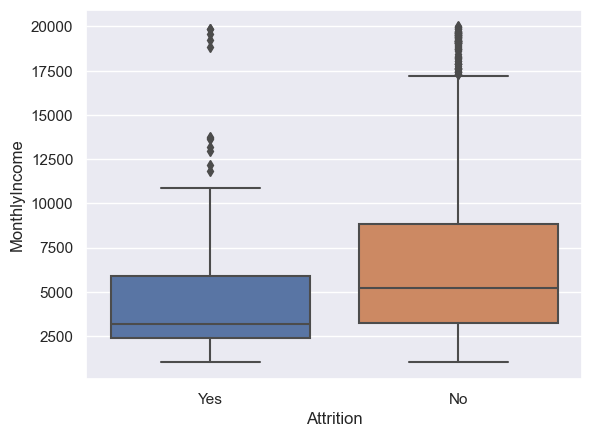

In [6]:
bp = sns.boxplot(y='MonthlyIncome', x='Attrition', data = emp)

<Axes: xlabel='Attrition', ylabel='MonthlyIncome'>

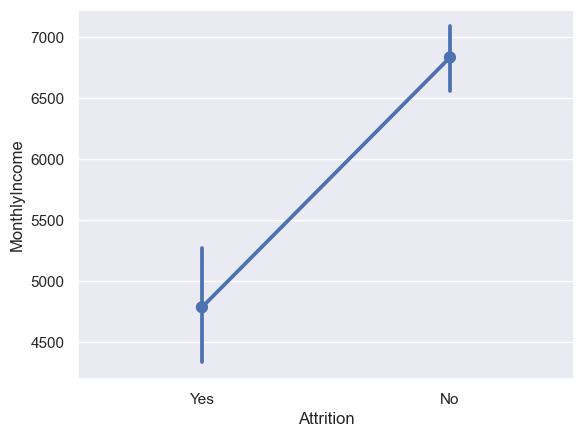

In [8]:
sns.pointplot(data=emp, x="Attrition", y="MonthlyIncome")win

In [ ]:
Attrition_Yes = emp[emp['Attrition'] == 'Yes']
Attrition_No = emp[emp['Attrition'] == 'No']

sns.histplot(data=emp, x='MonthlyIncome', hue="Attrition")

print (stats.describe(Attrition_Yes['MonthlyIncome']))
print (stats.describe(Attrition_No['MonthlyIncome']))

In [ ]:
stats.ttest_ind(Attrition_Yes['MonthlyIncome'], Attrition_No['MonthlyIncome'])

In [ ]:
def get_95_ci(array_1, array_2):
    sample_1_n = array_1.shape[0]
    sample_2_n = array_2.shape[0]
    sample_1_mean = array_1.mean()
    sample_2_mean = array_2.mean()
    sample_1_var = array_1.var()
    sample_2_var = array_2.var()
    mean_difference = sample_2_mean - sample_1_mean
    std_err_difference = math.sqrt((sample_1_var/sample_1_n)+(sample_2_var/sample_2_n))
    margin_of_error = 1.96 * std_err_difference
    ci_lower = mean_difference - margin_of_error
    ci_upper = mean_difference + margin_of_error
    return("The difference in means at the 95% confidence interval is between "+str(ci_lower)+" and "+str(ci_upper)+".")

get_95_ci(Attrition_Yes['MonthlyIncome'], Attrition_No['MonthlyIncome'])

The p-value of the T-Test is 0, which is less than our significance level, 0.05. Therefore, there is evidence to support that the average monthly income of former employees is different than the average monthly income of current employees.

The difference in means at the 95% confidence interval is between 1509.809526546714 and 2581.48413817964

# 4.Conclusion

In this analysis, we found that among former employees, salary was found to be significantly lower, with a median monthly income about $2,000/month less than current employees. 

This analysis will help the companies to understand one of the reason for the attrition and take the necessary action to retain the employees